# Serie A - Pressing


In [1]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
from matplotlib import rcParams
from matplotlib import cm
import matplotlib.colors as mcolors
from highlight_text import fig_text
import pandas as pd
import numpy as np

from PIL import Image
import urllib
import os

In [2]:
font_path = "assets/fonts/"
for x in os.listdir(font_path):
    for y in os.listdir(f"{font_path}/{x}"):
        if y.split(".")[-1] == "ttf":
            fm.fontManager.addfont(f"{font_path}/{x}/{y}")
            try:
                fm.FontProperties(weight=y.split("-")[-1].split(".")[0].lower(), fname=y.split("-")[0])
            except Exception:
                continue

plt.style.use("assets/stylesheets/soc_base.mplstyle")


## Leggere il dataframe

In [4]:
import ScraperFC as sfc
import traceback

# Initialize the Understat scraper
scraper = sfc.Understat()
try:
    # Scrape the table
    table = scraper.scrape_league_table(year=2023, league="Serie A")
    #formations = scraper.scrape_formations(year=2023, league="Serie A")

except:
    # Catch and print any exceptions. This allows us to still close the
    # scraper below, even if an exception occurs.
    traceback.print_exc()
finally:
    # It"s important to close the scraper when you"re done with it. Otherwise,
    # you"ll have a bunch of webdrivers open and running in the background.
    scraper.close()

table

[WDM] - Downloading: 100%|██████████| 6.80M/6.80M [00:00<00:00, 14.7MB/s]


,№,Team,M,W,D,L,G,GA,PTS,xG,NPxG,xGA,NPxGA,NPxGD,PPDA,OPPDA,DC,ODC,xPTS
0,1,Napoli,34,26,5,3,70,23,83,64.83,57.98,27.27,25.75,32.24,9.46,16.64,306,157,71.36
1,2,Juventus,34,20,6,8,52,28,66,53.68,48.99,35.76,32.72,16.27,13.37,11.89,185,185,58.1
2,3,Lazio,34,19,7,8,52,26,64,46.85,41.38,40.35,39.59,1.79,14.95,13.57,240,183,49.98
3,4,Inter,34,20,3,11,62,35,63,66.38,62.57,29.85,27.57,35.00,9.79,17.93,310,160,71.38
4,5,AC Milan,34,17,10,7,55,39,61,61.28,59.00,36.69,32.88,26.12,9.28,13.07,245,186,62.25
5,6,Atalanta,34,17,7,10,56,41,58,53.74,47.48,39.16,36.88,10.60,11.14,12.40,291,172,55.69
6,7,Roma,34,17,7,10,45,33,58,57.83,50.90,27.42,25.14,25.76,12.47,10.66,208,127,65.05
7,8,Fiorentina,34,12,10,12,45,40,46,48.8,44.23,45.58,40.25,3.98,8.47,11.49,261,157,47.81
8,9,Udinese,34,11,13,10,45,41,46,43.55,42.03,44.41,39.76,2.26,12.78,10.01,242,202,46.82
9,10,Bologna,34,12,10,12,43,44,46,39.37,34.81,49.96,43.11,-8.30,9.96,13.72,153,211,40.61


In [3]:
df = pd.read_csv('data/fouls_cards.csv', index_col=0)
df = df.sort_values(by='falli_per_cartellino').reset_index(drop=True)

df

,team_id,Team,Gialli,Rossi,DoppioGiallo,Falli,FalliSubiti,falli_per_cartellino
0,9882,Sampdoria,100,3,2,460,473,4.600000
1,8543,Lazio,77,2,0,355,430,4.610390
2,7943,Sassuolo,79,3,1,373,390,4.721519
3,8564,Milan,85,2,2,414,386,4.870588
4,8534,Empoli,79,6,2,390,407,4.936709
5,9881,Spezia,89,5,3,457,328,5.134831
6,8524,Atalanta,78,3,1,412,350,5.282051
7,8686,Roma,75,4,2,400,452,5.333333
8,8600,Udinese,76,1,0,417,432,5.486842
9,7801,Cremonese,77,3,0,423,355,5.493506


19    4.600000
1     4.610390
11    4.721519
5     4.870588
14    4.936709
17    5.134831
4     5.282051
6     5.333333
12    5.486842
18    5.493506
16    5.494382
7     5.518987
9     5.525000
8     5.532468
13    5.756757
2     5.955224
10    6.146667
15    6.586667
3     6.830508
0     8.309524
dtype: float64

## Visualizzazione

In [4]:
'''
gradient = [
    '#de6f57',
    '#d5724d',
    '#cb7644',
    '#c0783e',
    '#b57b38',
    '#a97d35',
    '#9e7f34',
    '#928134',
    '#878137',
    '#7c823a',
    '#71823f',
    '#668244',
    '#5c814a',
    '#528050',
    '#497f56',
    '#407d5b',
    '#387b61',
    '#317966',
    '#2c776a',
    '#29756e',
    '#287271',
]

'''

'''
gradient = [
'#146cf6',
'#1878cf',
'#01a6c3',
'#00a589',
'#029733',
'#02ac02',
'#899f84',
'#cbc000',
'#d2a900',
'#d88300',
'#d75609',
'#da2908',
'#cb0000'
]
'''

gradient = [
'#cb0000',
'#da2908',
'#d88300',
'#cbc000',
'#02ac02',
'#029733',
'#00a589',
'#01a6c3',
'#1878cf',
'#146cf6'
]

soc_cm = mcolors.LinearSegmentedColormap.from_list('SOC', gradient, N=50)
cm.register_cmap(name='SOC', cmap=soc_cm)

In [5]:
def plot_inequality(ax, fig, df):
    '''
    This function helps us save a bit of code to plot
    the different inequality metrics of our visual
    '''

    data = df.copy()
    data = (
        data
        .sort_values(by = "falli_per_cartellino", ascending = False)
        .reset_index(drop = True)
    )
    width = 0.7

    #fouls_per_card = data['Falli'] / data['Gialli']
    #fouls_per_card.sort_values(ascending=True)

    # Declare CMAP & Normalization
    norm = mcolors.Normalize(vmin=data['falli_per_cartellino'].min(),vmax=data['falli_per_cartellino'].max())
    cmap = plt.get_cmap('SOC')
    ax.bar(
        data.index, 
        data['falli_per_cartellino'],
        color=cmap(norm(data['falli_per_cartellino'])),
        #ec = "#000000", 
        #fc = "#74959A", 
        #alpha = 1,
        zorder = 3, 
        width = width
    )

    for index, value in enumerate(data['falli_per_cartellino']):
    
        format_str = f"{value:.2f}"
        text_ = ax.annotate(
            xy = (index, value-0.2),
            xytext = (1, -15),
            text = format_str,
            textcoords = "offset points",
            rotation = 90,
            ha = "center",
            va = "center",
            color = "black",
            size = 15
        )
        text_.set_path_effects(
            [path_effects.Stroke(linewidth=2, foreground="white"), 
            path_effects.Normal()]
        )

    # --- Axes transformations
    ax.grid(ls='--', lw=1, color='lightgrey', axis='y')
    ax.set_xlim(-1, 20)
    ax.spines["top"].set(visible = False)
    ax.spines["right"].set(visible = False)
    ax.spines["left"].set(visible = False)
    #ax.spines["bottom"].set(visible = False)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([x for x in range(0, 11, 1)])

    '''
    xticks_ = ax.xaxis.set_ticks(
        ticks = data.index,
        labels = []
    )
    '''

    #ax.tick_params(labelsize = 8)

    DC_to_FC = ax.transData.transform
    FC_to_NFC = fig.transFigure.inverted().transform

    # Native data to normalized data coordinates
    DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))

    fotmob_url = "https://images.fotmob.com/image_resources/logo/teamlogo/"
    for index, teamId in enumerate(data["team_id"]):
        ax_coords = DC_to_NFC([index - 0.35, -ax.get_ylim()[1]*.05])
        logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.03, 0.03], anchor = "W")
        club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}{teamId:.0f}.png"))
        logo_ax.imshow(club_icon)
        logo_ax.axis("off")
    
    #ax.tick_params(labelsize = 8)

    # -- Figure title and arrows --------------------------------
    
    ax.annotate(
        xy=(0,10),
        xytext=(6, 10),#ax.get_ylim()[1]),
        xycoords='data',
        textcoords='data',
        text='',
        arrowprops=dict(arrowstyle='->',color='gray')
    )
    ax.annotate(
        xy=(19,10),
        xytext=(13, 10),
        xycoords='data',
        textcoords='data',
        text='',
        arrowprops=dict(arrowstyle='->',color='gray')
    )
    
    ax.annotate(
        xy=(2.8,10),
        xytext=(6, 10),
        text='falli meno sanzionati',
        xycoords='data',
        textcoords='offset points',
        ha='center',
        va='center',
        size=12
    )
    ax.annotate(
        xy=(15.75,10),
        xytext=(13, 10),
        text='falli più sanzionati',
        xycoords='data',
        textcoords='offset points',
        ha='center',
        va='center',
        size=12
    )
    

    return ax

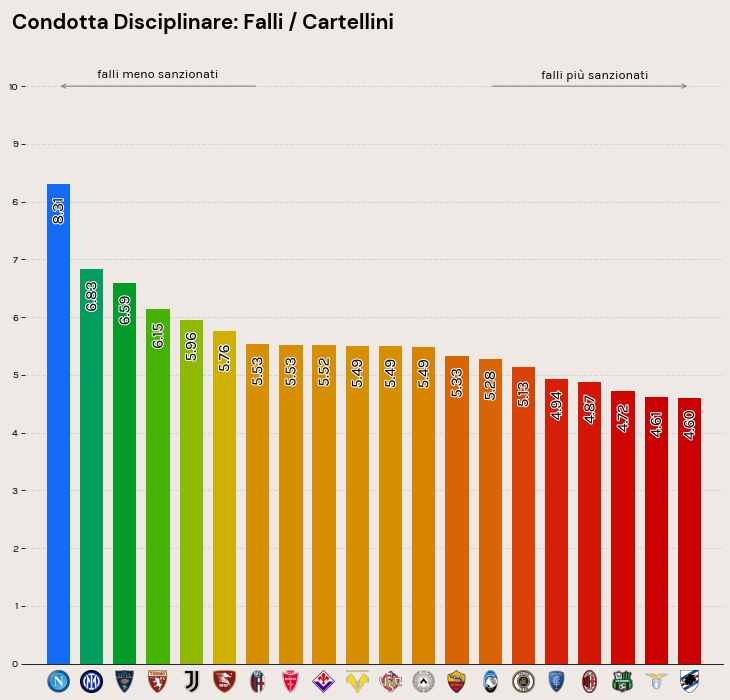

In [6]:
fig = plt.figure(figsize=(12,10), dpi=75)
ax = plt.subplot()
plot_inequality(ax, fig, df)

fig_text(
    x = 0.11, y = 0.95, #1.035, 
    s = "Condotta Disciplinare: Falli / Cartellini",
    va = "bottom", ha = "left",
    fontsize = 20, color = "black", font = "DM Sans", weight = "bold"
)

'''
fig_text(
	x = 0.11, y = .895, 
    s = "Inequality ratios on Serie A teams ball touches | Season 2021/2022 | Viz by @sonofacorner\nPlayers with +1,000 minutes. Ordered from most unequal to least equal spread of touches.\n\n<- Gini> is an index that measures inequality within a population, it takes values from 0\n (complete equality) to 1 (complete inequality).\n<- Palma> is a ratio that can be interpreted as the top 10% of players with the most touches have \nX times more touches than the bottom 40%.\n<- Hoover> measures the amount of touches that would need to be redistributed for all players to\nhave the same number of touches.",
    highlight_textprops=[{"weight": "bold", "color": "black"}, {"weight": "bold", "color": "black"}, {"weight": "bold", "color": "black"}],
	va = "bottom", ha = "left",
	fontsize = 8, color = "#4E616C", font = "Karla"
)
'''


plt.savefig(
	"figures/SerieA_Fouls_Cards.png",
	dpi = 600,
	facecolor = "#EFE9E6",
	bbox_inches="tight",
    edgecolor="none",
	transparent = False
)

plt.savefig(
	"figures/SerieA_Fouls_Cards_tr.png",
	dpi = 600,
	facecolor = "none",
	bbox_inches="tight",
    edgecolor="none",
	transparent = True
)


In [5]:
df = pd.read_csv('data/fouls_cards.csv', index_col=0)
df = df.sort_values(by='Gialli', ascending=False).reset_index(drop=True)

df['TotCartellini'] = df['Gialli'] + df['Rossi']
df

,team_id,Team,Gialli,Rossi,DoppioGiallo,Falli,FalliSubiti,falli_per_cartellino,TotCartellini
0,9882,Sampdoria,100,3,2,460,473,4.600000,103
1,9881,Spezia,89,5,3,457,328,5.134831,94
2,9876,Hellas Verona,89,3,0,489,347,5.494382,92
3,8564,Milan,85,2,2,414,386,4.870588,87
4,6504,Monza,80,2,1,442,443,5.525000,82
5,8534,Empoli,79,6,2,390,407,4.936709,85
6,8535,Fiorentina,79,2,2,436,472,5.518987,81
7,7943,Sassuolo,79,3,1,373,390,4.721519,82
8,8524,Atalanta,78,3,1,412,350,5.282051,81
9,7801,Cremonese,77,3,0,423,355,5.493506,80


In [3]:
def plot_inequality(ax, fig, df):
    '''
    This function helps us save a bit of code to plot
    the different inequality metrics of our visual
    '''

    data = df.copy()
    data = (
        data
        .sort_values(by = "TotCartellini", ascending = False)
        .reset_index(drop = True)
    )
    width = 0.7

    #fouls_per_card = data['Falli'] / data['Gialli']
    #fouls_per_card.sort_values(ascending=True)

    # Declare CMAP & Normalization
    #norm = mcolors.Normalize(vmin=data['TotCartellini'].min(),vmax=data['TotCartellini'].max())
    #cmap = plt.get_cmap('SOC')

    # We specify the width of the bar
    width_bar = 0.35

    # Fouls conceded
    ax.bar(
        data.index, 
        data['Gialli'], 
        #ec = "black", 
        lw = .75, 
        color = "#FFB000", 
        zorder = 3, 
        width = width_bar,
        label = "Cartellini Gialli"
    )

    ax.bar(
        data.index + width_bar, 
        data['Rossi'], 
        #ec = "black", 
        lw = .75, 
        color = "#785EF0", 
        zorder = 3, 
        width = width_bar,
        label = "Cartellini Rossi"
    )
    
    ax.legend(
        ncol = 2, 
        loc = "upper center", 
        bbox_to_anchor = (0.5, 1),#(0.45, 1.2),
        frameon = False,
        fontsize = 15
    )
    
    # --- Axes transformations
    ax.grid(ls='--', lw=1, color='lightgrey', axis='y')
    ax.set_xlim(-1, 20)
    ax.spines["top"].set(visible = False)
    ax.spines["right"].set(visible = False)
    ax.spines["left"].set(visible = False)
    #ax.spines["bottom"].set(visible = False)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([x for x in range(0, 120, 10)])

    '''
    xticks_ = ax.xaxis.set_ticks(
        ticks = data.index,
        labels = []
    )
    '''
    xticks_ = ax.xaxis.set_ticks(
        ticks = data.index + width_bar/2,
        labels = []
    )

    #ax.tick_params(labelsize = 8)

    DC_to_FC = ax.transData.transform
    FC_to_NFC = fig.transFigure.inverted().transform

    # Native data to normalized data coordinates
    DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))

    fotmob_url = "https://images.fotmob.com/image_resources/logo/teamlogo/"
    for index, teamId in enumerate(data["team_id"]):
        ax_coords = DC_to_NFC([index-width_bar/2, -ax.get_ylim()[1]*.05])
        logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.03, 0.03], anchor = "W")
        club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}{teamId:.0f}.png"))
        logo_ax.imshow(club_icon)
        logo_ax.axis("off")
    
    #ax.tick_params(labelsize = 8)


    # -- Figure title and arrows --------------------------------
    
    ax.annotate(
        xy=(0,110),
        xytext=(6, 110),#ax.get_ylim()[1]),
        xycoords='data',
        textcoords='data',
        text='',
        arrowprops=dict(arrowstyle='->',color='gray')
    )
    ax.annotate(
        xy=(19,110),
        xytext=(13, 110),
        xycoords='data',
        textcoords='data',
        text='',
        arrowprops=dict(arrowstyle='->',color='gray')
    )
    
    ax.annotate(
        xy=(2.8,93),
        xytext=(6, 93),
        text='+ fallosi',
        xycoords='data',
        textcoords='offset points',
        ha='center',
        va='center',
        size=12
    )
    ax.annotate(
        xy=(15.75,93),
        xytext=(13, 93),
        text='- fallosi',
        xycoords='data',
        textcoords='offset points',
        ha='center',
        va='center',
        size=12
    )
    

    return ax

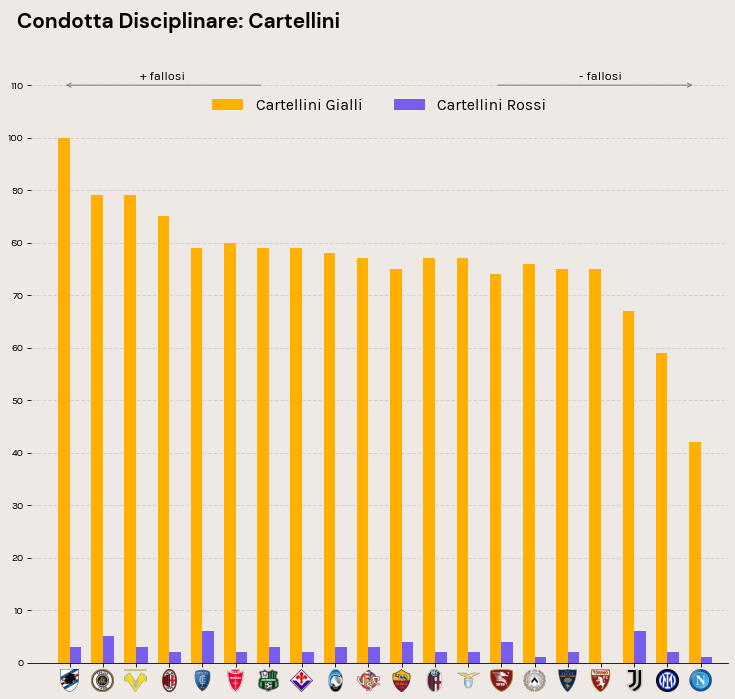

In [6]:
fig = plt.figure(figsize=(12,10), dpi=75)
ax = plt.subplot()
plot_inequality(ax, fig, df)

fig_text(
    x = 0.11, y = 0.95, #1.035, 
    s = "Condotta Disciplinare: Cartellini",
    va = "bottom", ha = "left",
    fontsize = 20, color = "black", font = "DM Sans", weight = "bold"
)

'''
fig_text(
	x = 0.11, y = .895, 
    s = "Inequality ratios on Serie A teams ball touches | Season 2021/2022 | Viz by @sonofacorner\nPlayers with +1,000 minutes. Ordered from most unequal to least equal spread of touches.\n\n<- Gini> is an index that measures inequality within a population, it takes values from 0\n (complete equality) to 1 (complete inequality).\n<- Palma> is a ratio that can be interpreted as the top 10% of players with the most touches have \nX times more touches than the bottom 40%.\n<- Hoover> measures the amount of touches that would need to be redistributed for all players to\nhave the same number of touches.",
    highlight_textprops=[{"weight": "bold", "color": "black"}, {"weight": "bold", "color": "black"}, {"weight": "bold", "color": "black"}],
	va = "bottom", ha = "left",
	fontsize = 8, color = "#4E616C", font = "Karla"
)
'''


plt.savefig(
	"figures/SerieA_Cards.png",
	dpi = 600,
	facecolor = "#EFE9E6",
	bbox_inches="tight",
    edgecolor="none",
	transparent = False
)

plt.savefig(
	"figures/SerieA_Cards_tr.png",
	dpi = 600,
	facecolor = "none",
	bbox_inches="tight",
    edgecolor="none",
	transparent = True
)


In [7]:
df["ratio"] = df["Falli"]/df["FalliSubiti"]
df = df.sort_values(by = "ratio", ascending = False)

# We define our series to be plotted
ratio = df["ratio"].reset_index(drop = True)
df

,team_id,Team,Gialli,Rossi,DoppioGiallo,Falli,FalliSubiti,falli_per_cartellino,TotCartellini,ratio
2,9876,Hellas Verona,89,3,0,489,347,5.494382,92,1.409222
1,9881,Spezia,89,5,3,457,328,5.134831,94,1.393293
14,9804,Torino,75,0,0,461,347,6.146667,75,1.328530
13,9888,Lecce,75,2,1,494,396,6.586667,77,1.247475
9,7801,Cremonese,77,3,0,423,355,5.493506,80,1.191549
8,8524,Atalanta,78,3,1,412,350,5.282051,81,1.177143
16,6480,Salernitana,74,4,1,426,380,5.756757,78,1.121053
18,8636,Inter,59,2,1,403,367,6.830508,61,1.098093
10,9857,Bologna,77,2,1,426,389,5.532468,79,1.095116
17,9885,Juventus,67,6,1,399,367,5.955224,73,1.087193


In [11]:
gradient = [
'#cb0000',
'#da2908',
'#d88300',
'#cbc000',
'#02ac02',
'#029733',
'#00a589',
'#01a6c3',
'#1878cf',
'#146cf6'
]

gradient.reverse()

soc_cm = mcolors.LinearSegmentedColormap.from_list('SOC', gradient, N=50)
cm.register_cmap(name='SOC', cmap=soc_cm)

C:\Users\vince\AppData\Local\Temp\ipykernel_6532\100430354.py:17: UserWarning: Trying to register the cmap 'SOC' which already exists.
  cm.register_cmap(name='SOC', cmap=soc_cm)


In [36]:
def plot_inequality(ax, fig, df):
    '''
    This function helps us save a bit of code to plot
    the different inequality metrics of our visual
    '''

    data = df.copy()
    data = (
        data
        .sort_values(by = "ratio", ascending = False)
        .reset_index(drop = True)
    )
    width = 0.7


    # Declare CMAP & Normalization
    norm = mcolors.Normalize(vmin=data['ratio'].min(),vmax=data['ratio'].max())
    cmap = plt.get_cmap('SOC')
    ax.bar(
        data.index, 
        data['ratio'],
        color=cmap(norm(data['ratio'])),
        #ec = "#000000", 
        #fc = "#74959A", 
        #alpha = 1,
        zorder = 3, 
        width = width
    )

    for index, value in enumerate(data['ratio']):
    
        format_str = f"{value:.2f}"
        text_ = ax.annotate(
            xy = (index, value-0.02),
            xytext = (1, -15),
            text = format_str,
            textcoords = "offset points",
            rotation = 90,
            ha = "center",
            va = "center",
            color = "black",
            size = 15
        )
        text_.set_path_effects(
            [path_effects.Stroke(linewidth=2, foreground="white"), 
            path_effects.Normal()]
        )

    # --- Axes transformations
    ax.grid(ls='--', lw=1, color='lightgrey', axis='y')
    ax.set_xlim(-1, 20)
    ax.spines["top"].set(visible = False)
    ax.spines["right"].set(visible = False)
    ax.spines["left"].set(visible = False)
    #ax.spines["bottom"].set(visible = False)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks(np.arange(0, 1.8, 0.1))#[x for x in range(0.0, 2.0, 0.1)])

    '''
    xticks_ = ax.xaxis.set_ticks(
        ticks = data.index,
        labels = []
    )
    '''

    #ax.tick_params(labelsize = 8)

    DC_to_FC = ax.transData.transform
    FC_to_NFC = fig.transFigure.inverted().transform

    # Native data to normalized data coordinates
    DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))

    fotmob_url = "https://images.fotmob.com/image_resources/logo/teamlogo/"
    for index, teamId in enumerate(data["team_id"]):
        ax_coords = DC_to_NFC([index - 0.35, -ax.get_ylim()[1]*.05])
        logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.03, 0.03], anchor = "W")
        club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}{teamId:.0f}.png"))
        logo_ax.imshow(club_icon)
        logo_ax.axis("off")
    
    #ax.tick_params(labelsize = 8)

    # -- Figure title and arrows --------------------------------
    
    ax.annotate(
        xy=(0,1.6),
        xytext=(6, 1.6),#ax.get_ylim()[1]),
        xycoords='data',
        textcoords='data',
        text='',
        arrowprops=dict(arrowstyle='->',color='gray')
    )
    ax.annotate(
        xy=(19,1.6),
        xytext=(13, 1.6),
        xycoords='data',
        textcoords='data',
        text='',
        arrowprops=dict(arrowstyle='->',color='gray')
    )
    
    ax.annotate(
        xy=(2.8,1.62),
        xytext=(6, 1.62),
        text='+ falli fatti',
        xycoords='data',
        textcoords='offset points',
        ha='center',
        va='center',
        size=12
    )
    ax.annotate(
        xy=(15.75,1.62),
        xytext=(13, 1.62),
        text='+ falli subiti',
        xycoords='data',
        textcoords='offset points',
        ha='center',
        va='center',
        size=12
    )
    

    return ax

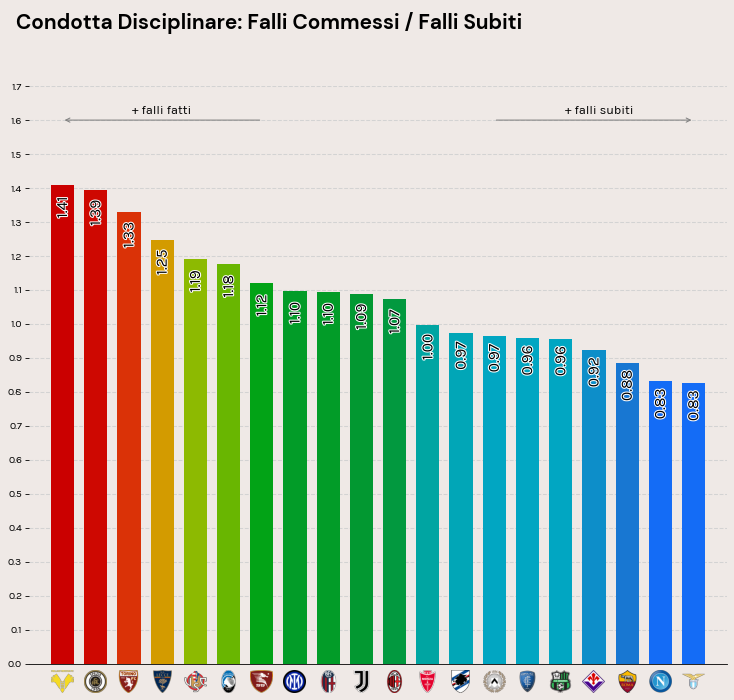

In [37]:
fig = plt.figure(figsize=(12,10), dpi=75)
ax = plt.subplot()
plot_inequality(ax, fig, df)

fig_text(
    x = 0.11, y = 0.95, #1.035, 
    s = "Condotta Disciplinare: Falli Commessi / Falli Subiti",
    va = "bottom", ha = "left",
    fontsize = 20, color = "black", font = "DM Sans", weight = "bold"
)

'''
fig_text(
	x = 0.11, y = .895, 
    s = "Inequality ratios on Serie A teams ball touches | Season 2021/2022 | Viz by @sonofacorner\nPlayers with +1,000 minutes. Ordered from most unequal to least equal spread of touches.\n\n<- Gini> is an index that measures inequality within a population, it takes values from 0\n (complete equality) to 1 (complete inequality).\n<- Palma> is a ratio that can be interpreted as the top 10% of players with the most touches have \nX times more touches than the bottom 40%.\n<- Hoover> measures the amount of touches that would need to be redistributed for all players to\nhave the same number of touches.",
    highlight_textprops=[{"weight": "bold", "color": "black"}, {"weight": "bold", "color": "black"}, {"weight": "bold", "color": "black"}],
	va = "bottom", ha = "left",
	fontsize = 8, color = "#4E616C", font = "Karla"
)
'''


plt.savefig(
	"figures/SerieA_Ratio_Fouls.png",
	dpi = 600,
	facecolor = "#EFE9E6",
	bbox_inches="tight",
    edgecolor="none",
	transparent = False
)

plt.savefig(
	"figures/SerieA_Ratio_Fouls_tr.png",
	dpi = 600,
	facecolor = "none",
	bbox_inches="tight",
    edgecolor="none",
	transparent = True
)
